columns in file: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']
using columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Class: 0
Mean:
sepal length (cm)    5.006
sepal width (cm)     3.428
petal length (cm)    1.462
petal width (cm)     0.246
dtype: float64
Std:
sepal length (cm)    0.352490
sepal width (cm)     0.379064
petal length (cm)    0.173664
petal width (cm)     0.105386
dtype: float64
Range:
sepal length (cm)    1.5
sepal width (cm)     2.1
petal length (cm)    0.9
petal width (cm)     0.5
dtype: float64
----------------------------------------
Correlation matrix for class: 0
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000          0.742547           0.267176   
sepal width (cm)            0.742547          1.000000           0.177700   
petal length (cm)           0.267176          0.177700           1.000000   
petal width

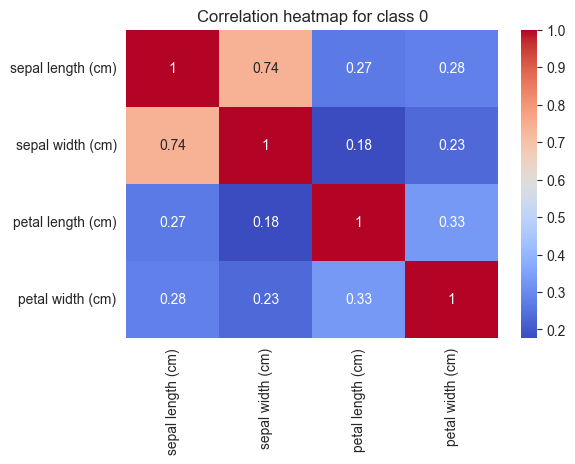

Class: 1
Mean:
sepal length (cm)    5.936
sepal width (cm)     2.770
petal length (cm)    4.260
petal width (cm)     1.326
dtype: float64
Std:
sepal length (cm)    0.516171
sepal width (cm)     0.313798
petal length (cm)    0.469911
petal width (cm)     0.197753
dtype: float64
Range:
sepal length (cm)    2.1
sepal width (cm)     1.4
petal length (cm)    2.1
petal width (cm)     0.8
dtype: float64
----------------------------------------
Correlation matrix for class: 1
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000          0.525911           0.754049   
sepal width (cm)            0.525911          1.000000           0.560522   
petal length (cm)           0.754049          0.560522           1.000000   
petal width (cm)            0.546461          0.663999           0.786668   

                   petal width (cm)  
sepal length (cm)          0.546461  
sepal width (cm)           0.663999  
petal length (cm)          

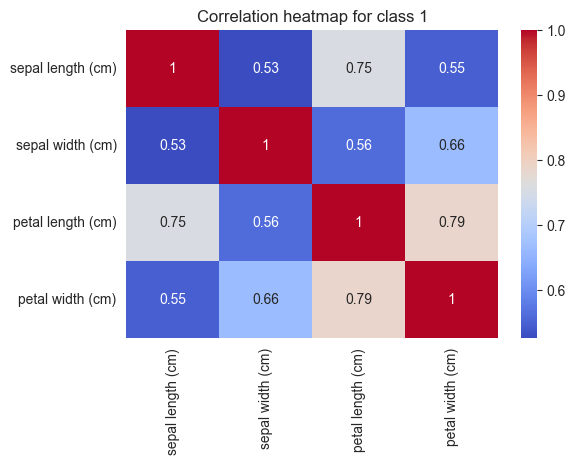

Class: 2
Mean:
sepal length (cm)    6.588
sepal width (cm)     2.974
petal length (cm)    5.552
petal width (cm)     2.026
dtype: float64
Std:
sepal length (cm)    0.635880
sepal width (cm)     0.322497
petal length (cm)    0.551895
petal width (cm)     0.274650
dtype: float64
Range:
sepal length (cm)    3.0
sepal width (cm)     1.6
petal length (cm)    2.4
petal width (cm)     1.1
dtype: float64
----------------------------------------
Correlation matrix for class: 2
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000          0.457228           0.864225   
sepal width (cm)            0.457228          1.000000           0.401045   
petal length (cm)           0.864225          0.401045           1.000000   
petal width (cm)            0.281108          0.537728           0.322108   

                   petal width (cm)  
sepal length (cm)          0.281108  
sepal width (cm)           0.537728  
petal length (cm)          

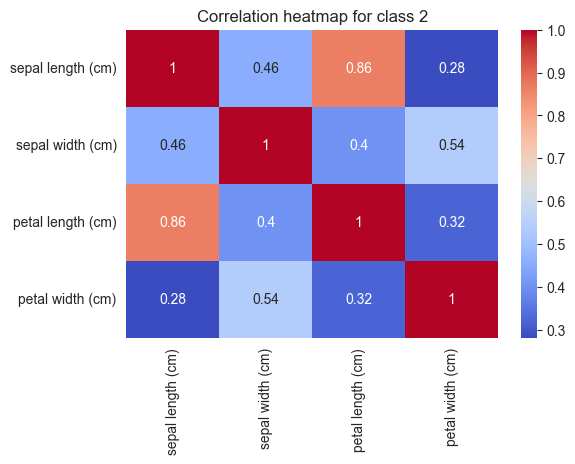

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import difflib
df = pd.read_csv("iris_dataset.csv")
features = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
print("columns in file:", df.columns.tolist())
df.columns = df.columns.str.strip()
found = [c for c in features if c in df.columns]
missing = [c for c in features if c not in df.columns]
if missing:
    lowered = {col.lower(): col for col in df.columns}
    for f in missing[:]:
        if f.lower() in lowered:
            found.append(lowered[f.lower()])
            missing.remove(f)
if missing:
    for f in missing[:]:
        cand = difflib.get_close_matches(f, df.columns, n=1, cutoff=0.6)
        if cand:
            print(f"fuzzy match: {f} -> {cand[0]}")
            found.append(cand[0])
            missing.remove(f)
if missing:
    raise KeyError(f"these expected feature names were not found in the CSV: {missing}\nactual columns: {df.columns.tolist()}")
print("using columns:", found)
groups = df.groupby("target")
for t, g in groups:
    print("Class:", t)
    print("Mean:")
    print(g[found].mean())
    print("Std:")
    print(g[found].std())
    print("Range:")
    print(g[found].max() - g[found].min())
    print("-"*40)
    corr = g[found].corr()
    print("Correlation matrix for class:", t)
    print(corr)
    plt.figure(figsize=(6,4))
    sns.heatmap(corr, annot=True, cmap="coolwarm")
    plt.title("Correlation heatmap for class " + str(t))
    plt.show()
